In [2]:
import pandas as pd
import numpy as np
import math
import scipy
from scipy import stats

In [3]:
stats.t.ppf(0.0025,13)

-3.3724679378582554

In [4]:
metro=[3,7,25,10,15]
rural=[48,44,40,38,35]
stats.ttest_ind(metro,rural,equal_var=False)
    

Ttest_indResult(statistic=-6.550432296063072, pvalue=0.0004203925153912486)

In [5]:
metro=[3,7,25,10,15]
rural=[48,44,40,38,35]
stats.ttest_rel(metro,rural)
    

TtestResult(statistic=-5.303497930706049, pvalue=0.0060728031285194545, df=4)

In [6]:
import math
def two_samp_proportion(p1,p2,n1,n2):
    p_pool=((p1*n1)+(p2*n2))/(n1+n2)
    x=(p_pool*(1-p_pool)*((1/n1)+(1/n2)))
    s=math.sqrt(x)
    z=(p1-p2)/s
    if(z<0):
        p_val=stats.norm.cdf(z)
    else:
        p_val=1-stats.norm.cdf(z)
    return z, p_val*2

In [7]:
two_samp_proportion(0.27,0.19,100,100)

(1.3442056254198995, 0.17888190308175567)

In [8]:
stats.norm.cdf(1.344205)

0.910558947366134

In [9]:

from scipy import stats
from scipy.stats import f
from scipy.stats import poisson
scipy.stats.f.ppf(q=1-0.05, dfn=15, dfd=10)

2.8450165269958436

In [10]:
f1=scipy.stats.f.ppf(q=0.05, dfn=15, dfd=15)

In [11]:
x=[3,9,3,4,5,6]
y=[1,2,3,4,5,6]
f=np.var(x)/np.var(y)

In [12]:
dfn=len(x)-1
dfd=len(y)-1

In [13]:
p_value=scipy.stats.f.cdf(f,dfn,dfd)

In [14]:
p_value


0.6627143533357427

In [15]:
def samplesize(alfa,beta,mu1,mu2,sigma):
    z1=-1*stats.norm.ppf(alfa)
    z2=-1*stats.norm.ppf(beta)
    n=((((z1+z2)**2)*(sigma**2))/(mu1-mu2)**2)
    print(n)

In [16]:
samplesize(0.05,0.08,5,7,2)

9.302043647889692


In [17]:
a=[4,3,2]
b=[2,4,6]
c=[2,1,3]

In [18]:
stats.f_oneway(a,b,c)

F_onewayResult(statistic=1.5, pvalue=0.2962962962962963)

In [19]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

In [20]:
data=pd.read_excel('mooc data analysis\oneway.xlsx')

In [21]:
data

,Black Board,Case Presentation,PPT
0,4,2,2
1,3,4,1
2,2,6,3


In [22]:
data = pd.DataFrame({'Black Board': {0: 4, 1: 3, 2: 2}, 
                   'Case Presentation': {0: 2, 1: 4, 2: 6}, 
                   'PPT': {0: 2, 1: 1, 2: 3}}) 
data

,Black Board,Case Presentation,PPT
0,4,2,2
1,3,4,1
2,2,6,3


In [23]:
datanew=pd.melt(data, id_vars=['Black Board'], value_vars=['Case Presentation','PPT'])
print(datanew)

   Black Board           variable  value
0            4  Case Presentation      2
1            3  Case Presentation      4
2            2  Case Presentation      6
3            4                PPT      2
4            3                PPT      1
5            2                PPT      3


In [24]:
datanew.columns=['index','treatments','value']

In [25]:
datanew

,index,treatments,value
0,4,Case Presentation,2
1,3,Case Presentation,4
2,2,Case Presentation,6
3,4,PPT,2
4,3,PPT,1
5,2,PPT,3


In [26]:
model=ols('value~C(treatments)',data=datanew).fit()

In [27]:
model.summary()

C:\Users\prash\AppData\Roaming\Python\Python310\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     2.400
Date:                Tue, 27 Aug 2024   Prob (F-statistic):              0.196
Time:                        12:13:43   Log-Likelihood:                -10.046
No. Observations:                   6   AIC:                             24.09
Df Residuals:                       4   BIC:                             23.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.0000      0.913      4.382      0.012       1.465       6.535
C(treatments)[T.PPT]    -2.0000      1.291     -1.549      0.196      -5.584       1.584
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.700
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.230
Skew:                          -0.000   Prob(JB):                        0.891
Kurtosis:                       2.040   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

model.summary()

In [28]:

# Create a simple dataframe 
  
# importing pandas as pd 
import pandas as pd 
  
# creating a dataframe 
df = pd.DataFrame({'Name': {0: 'John', 1: 'Bob', 2: 'Shiela'}, 
                   'Course': {0: 'Masters', 1: 'Graduate', 2: 'Graduate'}, 
                   'Age': {0: 27, 1: 23, 2: 21}}) 
df 

,Name,Course,Age
0,John,Masters,27
1,Bob,Graduate,23
2,Shiela,Graduate,21


In [29]:
# Name is id_vars and Course is value_vars 
pd.melt(df, id_vars =['Name'], value_vars =['Course']) 

,Name,variable,value
0,John,Course,Masters
1,Bob,Course,Graduate
2,Shiela,Course,Graduate


In [30]:
anova_table=sm.stats.anova_lm(model,type=1)

In [31]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),1.0,6.0,6.0,2.4,0.196261
Residual,4.0,10.0,2.5,NaN,NaN


In [32]:
fivep=[7,8,95,11,9,10]
tenp=[74,8,95,141,0,30]
fifteenp=[27,48,95,161,98,10]
twentyp=[74,84,9,11,95,160]
box_plot_data=[fivep,tenp,fifteenp,twentyp]

{'whiskers': [<matplotlib.lines.Line2D at 0x14ca13ab220>,
 'caps': [<matplotlib.lines.Line2D at 0x14ca13ab760>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ca13aaf80>,
 'medians': [<matplotlib.lines.Line2D at 0x14c9f29b040>,
 'fliers': [<matplotlib.lines.Line2D at 0x14c9f298a60>,
 'means': []}

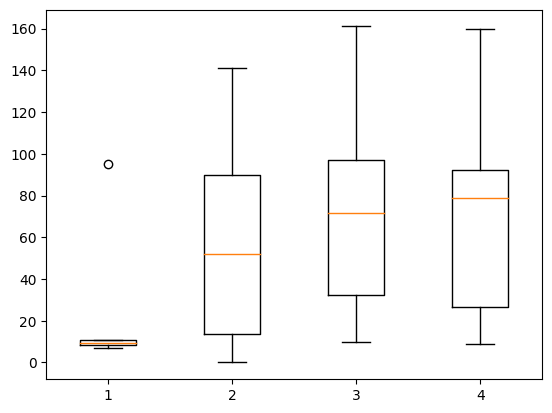

In [33]:
plt.boxplot(box_plot_data)

In [117]:
plt.show()

In [34]:
#p value
1-scipy.stats.f.cdf(0.6,4,5)

0.6795458900175544

In [35]:
#f value
scipy.stats.f.ppf(1-0.01,4,5)

11.391928071349763

In [36]:
scipy.stats.f_oneway(fivep,tenp,fifteenp,twentyp)
#gives f and p value

F_onewayResult(statistic=1.2265003217482984, pvalue=0.32610743788671676)

In [37]:
1-scipy.stats.f.cdf(19.6,3,20)

3.599599239012541e-06

In [38]:
scipy.stats.f.ppf(1-0.01,dfn=3,dfd=20)

4.938193382310539

In [40]:
data=pd.read_excel('mooc data analysis\Tensile strength of paper.xlsx')

In [41]:
data

,hardwood concentration 5%,hardwood concentration 10%,hardwood concentration 15%,hardwood concentration 20%
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [43]:
datanew = pd.melt(data, id_vars=['index'], value_vars=['Case Presentation','PPT'])
datanew

KeyError: "The following 'id_vars' are not present in the DataFrame: ['index']"

In [44]:
#fishers lsd test
t=scipy.stats.t.ppf(0.05,20)

In [45]:
t

-1.7247182429207863

In [46]:
t=t*-1

In [47]:
t


1.7247182429207863

In [48]:
n=6

In [49]:
MSE=6.50833

In [50]:
lsd=t*math.sqrt(2*MSE/n)
lsd

2.540342724459959

In [51]:
#tukey krammer test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc=MultiComparison(datanew['value'],datanew['treatments'])
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
Case Presentation,PPT,-2.0,0.1963,-5.5844,1.5844,False
